In [3]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def first_cheby_poly(x, n):
    '''Generate n-th order Chebyshev ploynominals of first kind.'''
    if n == 0: return 1
    elif n == 1: return x
    result = 2. * x * first_cheby_poly(x, 1) - first_cheby_poly(x, 0)
    m = 0
    while n - m > 2:
        result = 2. * x * result - first_cheby_poly(x, m+1)
        m += 1
    return result
    
def reduced_T(T, T_min, T_max):
    '''Calculate the reduced temperature.'''
    T=float(T)
    T_min=float(T_min)
    T_max = float(T_max)
    T_tilde = 2.0 * T ** (-1) - T_min ** (-1) - T_max ** (-1)
    T_tilde /= (T_max ** (-1) - T_min ** (-1))
    return T_tilde
        
def reduced_P(P, P_min, P_max):
    '''Calculate the reduced pressure.'''
    P_tilde = 2.0 * np.log(P) - np.log(P_min) - np.log(P_max)
    P_tilde /= (np.log(P_max) - np.log(P_min))
    return P_tilde
        
def fit_cheby_poly(n_T, n_P, k, T_ls, P_ls):
    '''Fit the Chebyshev polynominals to rate constants.
          Input rate constants vector k should be arranged based on pressure.'''
    cheb_mat = np.zeros((len(k), n_T * n_P))
    for n, P in enumerate(P_ls):       # !! assume that at each presssure, we have the same temperateure range
        P_min = P_ls[0]
        P_max = P_ls[-1]
        for m, T in enumerate(T_ls):
            T_min = T_ls[0]
            T_max = T_ls[-1]
            for i in range(n_P):
                P_tilde = reduced_P(P, P_min, P_max)
                P_cheb = first_cheby_poly(P_tilde, i)
                for j in range(n_T):
                    T_tilde = reduced_T(T, T_min, T_max)
                    T_cheb = first_cheby_poly(T_tilde, j)
                    cheb_mat[n*len(T_ls)+m, i*n_T+j] = P_cheb * T_cheb
                        
    coef = np.linalg.pinv(cheb_mat)
    coef = np.dot(coef, k)
    return coef

In [8]:
gas = ct.Solution('Original_and_perturbed_reaction.cti')
k = [[],[],[],[],[],[],[]]
temperature=[[],[],[],[],[],[],[]]
for i,pressure in enumerate([.1,.2,1,3,5,7,10]):
    for temp in np.arange(200,2401): 
        gas.TPX = temp,pressure*101325,{'Ar':1}
        k[i].append(gas.forward_rate_constants[0]*1000)
        temperature[i].append(temp)

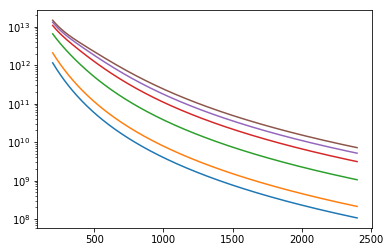

In [9]:
plt.figure()
plt.semilogy(temperature[0],k[0])
plt.semilogy(temperature[1],k[1])
plt.semilogy(temperature[2],k[2])
plt.semilogy(temperature[3],k[3])
plt.semilogy(temperature[4],k[4])
plt.semilogy(temperature[5],k[5])

In [12]:
k_combined=np.log10(np.array(k[0]+k[1]+k[2]+k[3]+k[4]+k[5]+k[6]))
temp_combined=temperature[0]
pressure_combined = [.1,.2,1,3,5,7,10]
len(k_combined)
len(temp_combined)

2201

In [13]:
coef_original = fit_cheby_poly(19,4,k_combined,temp_combined,pressure_combined)

In [14]:
coef_original.reshape(4,19).T


array([[ 1.15528028e+01,  7.73455456e-01, -5.41660727e-02,
        -1.78614003e-03],
       [-1.57263023e+00,  2.28194909e-01,  4.68728083e-02,
        -4.39214642e-03],
       [-5.69538386e-01,  1.37454178e-02,  1.54132250e-02,
         7.01805062e-03],
       [-2.29108645e-01, -2.21481745e-02, -5.68600038e-03,
         1.28424543e-03],
       [-9.14908157e-02, -6.99931515e-03, -5.00724802e-03,
        -2.12193914e-03],
       [-3.75338038e-02,  1.48991337e-03, -1.70690240e-04,
        -8.10327061e-04],
       [-1.68293598e-02,  1.66177914e-03,  1.00097121e-03,
         3.52267882e-04],
       [-8.27894370e-03,  2.91482616e-04,  3.47393920e-04,
         2.89039627e-04],
       [-4.18240927e-03, -1.83963462e-04, -8.34412500e-05,
         2.92175557e-06],
       [-2.06043824e-03, -1.08076726e-04, -9.08488552e-05,
        -5.97694574e-05],
       [-9.95363901e-04, -4.65870093e-06, -1.33687908e-05,
        -1.78660676e-05],
       [-4.88445848e-04,  1.58313515e-05,  1.17041096e-05,
      

In [39]:
coef_original = np.array([[ 1.15528028e+01,  7.73455456e-01, -5.41660727e-02,
        -1.78614003e-03],
       [-1.57263023e+00,  2.28194909e-01,  4.68728083e-02,
        -4.39214642e-03],
       [-5.69538386e-01,  1.37454178e-02,  1.54132250e-02,
         7.01805062e-03],
       [-2.29108645e-01, -2.21481745e-02, -5.68600038e-03,
         1.28424543e-03],
       [-9.14908157e-02, -6.99931515e-03, -5.00724802e-03,
        -2.12193914e-03],
       [-3.75338038e-02,  1.48991337e-03, -1.70690240e-04,
        -8.10327061e-04],
       [-1.68293598e-02,  1.66177914e-03,  1.00097121e-03,
         3.52267882e-04],
       [-8.27894370e-03,  2.91482616e-04,  3.47393920e-04,
         2.89039627e-04],
       [-4.18240927e-03, -1.83963462e-04, -8.34412500e-05,
         2.92175557e-06],
       [-2.06043824e-03, -1.08076726e-04, -9.08488552e-05,
        -5.97694574e-05],
       [-9.95363901e-04, -4.65870093e-06, -1.33687908e-05,
        -1.78660676e-05],
       [-4.88445848e-04,  1.58313515e-05,  1.17041096e-05,
         6.23387692e-06],
       [-2.48775037e-04,  5.61687393e-06,  5.79376847e-06,
         5.06800571e-06],
       [-1.28108711e-04, -7.54189678e-07, -2.22153230e-07,
         3.43728061e-07],
       [-6.68453046e-05, -1.08395568e-06, -1.01099478e-06,
        -7.72281723e-07],
       [-3.28996528e-05, -1.98973070e-07, -2.58359444e-07,
        -2.72508835e-07],
       [-1.84244147e-05,  1.02275179e-07,  7.66696713e-08,
         4.33466461e-08],
       [-6.80859183e-06,  6.61849541e-08,  6.58241472e-08,
         5.75063680e-08],
       [-7.79493803e-06, -2.75708145e-09, -1.19379275e-09,
         2.07342998e-09]])

array([[ 1.15571454e+01,  7.73455492e-01, -5.41660708e-02,
        -1.78614273e-03],
       [-1.57263026e+00,  2.28194880e-01,  4.68728123e-02,
        -4.39214216e-03],
       [-5.69538391e-01,  1.37454062e-02,  1.54132186e-02,
         7.01805036e-03],
       [-2.29108642e-01, -2.21481721e-02, -5.68600210e-03,
         1.28424341e-03],
       [-9.14908135e-02, -6.99931135e-03, -5.00724615e-03,
        -2.12193903e-03],
       [-3.75338036e-02,  1.48991406e-03, -1.70689226e-04,
        -8.10326290e-04],
       [-1.68293602e-02,  1.66177846e-03,  1.00097098e-03,
         3.52267996e-04],
       [-8.27894391e-03,  2.91482220e-04,  3.47393583e-04,
         2.89039426e-04],
       [-4.18240926e-03, -1.83963451e-04, -8.34413000e-05,
         2.92167226e-06],
       [-2.06043819e-03, -1.08076639e-04, -9.08487935e-05,
        -5.97694294e-05],
       [-9.95363885e-04, -4.65867404e-06, -1.33687604e-05,
        -1.78660400e-05],
       [-4.88445852e-04,  1.58313434e-05,  1.17041062e-05,
      

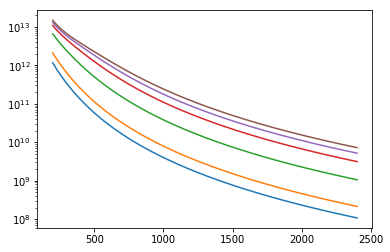

In [22]:
# PERTURBING A
gas = ct.Solution('Original_and_perturbed_reaction.cti')
k = [[],[],[],[],[],[],[]]
temperature=[[],[],[],[],[],[],[]]
for i,pressure in enumerate([.1,.2,1,3,5,7,10]):
    for temp in np.arange(200,2401): 
        gas.TPX = temp,pressure*101325,{'Ar':1}
        k[i].append(gas.forward_rate_constants[0]*1000)
        temperature[i].append(temp)
plt.figure()
plt.semilogy(temperature[0],k[0])
plt.semilogy(temperature[1],k[1])
plt.semilogy(temperature[2],k[2])
plt.semilogy(temperature[3],k[3])
plt.semilogy(temperature[4],k[4])
plt.semilogy(temperature[5],k[5])
k_combined_A=np.log10(np.array(k[0]+k[1]+k[2]+k[3]+k[4]+k[5]+k[6]))
temp_combined=temperature[0]
pressure_combined = [.1,.2,1,3,5,7,10]
coef_A = fit_cheby_poly(19,4,k_combined_A,temp_combined,pressure_combined)
coef_A.reshape(4,19).T


In [23]:
coef_A = fit_cheby_poly(19,4,k_combined_A,temp_combined,pressure_combined)
coef_A.reshape(4,19).T

array([[ 1.15571454e+01,  7.73455492e-01, -5.41660708e-02,
        -1.78614273e-03],
       [-1.57263026e+00,  2.28194880e-01,  4.68728123e-02,
        -4.39214216e-03],
       [-5.69538391e-01,  1.37454062e-02,  1.54132186e-02,
         7.01805036e-03],
       [-2.29108642e-01, -2.21481721e-02, -5.68600210e-03,
         1.28424341e-03],
       [-9.14908135e-02, -6.99931135e-03, -5.00724615e-03,
        -2.12193903e-03],
       [-3.75338036e-02,  1.48991406e-03, -1.70689226e-04,
        -8.10326290e-04],
       [-1.68293602e-02,  1.66177846e-03,  1.00097098e-03,
         3.52267996e-04],
       [-8.27894391e-03,  2.91482220e-04,  3.47393583e-04,
         2.89039426e-04],
       [-4.18240926e-03, -1.83963451e-04, -8.34413000e-05,
         2.92167226e-06],
       [-2.06043819e-03, -1.08076639e-04, -9.08487935e-05,
        -5.97694294e-05],
       [-9.95363885e-04, -4.65867404e-06, -1.33687604e-05,
        -1.78660400e-05],
       [-4.88445852e-04,  1.58313434e-05,  1.17041062e-05,
      

In [24]:
A_coefficient = np.array([[ 1.15571454e+01,  7.73455492e-01, -5.41660708e-02,
        -1.78614273e-03],
       [-1.57263026e+00,  2.28194880e-01,  4.68728123e-02,
        -4.39214216e-03],
       [-5.69538391e-01,  1.37454062e-02,  1.54132186e-02,
         7.01805036e-03],
       [-2.29108642e-01, -2.21481721e-02, -5.68600210e-03,
         1.28424341e-03],
       [-9.14908135e-02, -6.99931135e-03, -5.00724615e-03,
        -2.12193903e-03],
       [-3.75338036e-02,  1.48991406e-03, -1.70689226e-04,
        -8.10326290e-04],
       [-1.68293602e-02,  1.66177846e-03,  1.00097098e-03,
         3.52267996e-04],
       [-8.27894391e-03,  2.91482220e-04,  3.47393583e-04,
         2.89039426e-04],
       [-4.18240926e-03, -1.83963451e-04, -8.34413000e-05,
         2.92167226e-06],
       [-2.06043819e-03, -1.08076639e-04, -9.08487935e-05,
        -5.97694294e-05],
       [-9.95363885e-04, -4.65867404e-06, -1.33687604e-05,
        -1.78660400e-05],
       [-4.88445852e-04,  1.58313434e-05,  1.17041062e-05,
         6.23387849e-06],
       [-2.48775041e-04,  5.61686624e-06,  5.79376130e-06,
         5.06800025e-06],
       [-1.28108712e-04, -7.54190597e-07, -2.22154753e-07,
         3.43726189e-07],
       [-6.68453040e-05, -1.08395458e-06, -1.01099389e-06,
        -7.72281180e-07],
       [-3.28996525e-05, -1.98972581e-07, -2.58358911e-07,
        -2.72508339e-07],
       [-1.84244147e-05,  1.02275144e-07,  7.66696737e-08,
         4.33466864e-08],
       [-6.80859189e-06,  6.61848579e-08,  6.58240534e-08,
         5.75062901e-08],
       [-7.79493804e-06, -2.75709078e-09, -1.19380658e-09,
         2.07341300e-09]])

array([[ 1.15796308e+01,  7.73455456e-01, -5.41660727e-02,
        -1.78614003e-03],
       [-1.56783578e+00,  2.28194909e-01,  4.68728083e-02,
        -4.39214642e-03],
       [-5.68215162e-01,  1.37454178e-02,  1.54132250e-02,
         7.01805062e-03],
       [-2.28621715e-01, -2.21481745e-02, -5.68600038e-03,
         1.28424543e-03],
       [-9.12892341e-02, -6.99931515e-03, -5.00724802e-03,
        -2.12193914e-03],
       [-3.74447883e-02,  1.48991337e-03, -1.70690240e-04,
        -8.10327061e-04],
       [-1.67884145e-02,  1.66177914e-03,  1.00097121e-03,
         3.52267882e-04],
       [-8.25957153e-03,  2.91482616e-04,  3.47393920e-04,
         2.89039627e-04],
       [-4.17305306e-03, -1.83963462e-04, -8.34412500e-05,
         2.92175557e-06],
       [-2.05584809e-03, -1.08076726e-04, -9.08488552e-05,
        -5.97694574e-05],
       [-9.93083423e-04, -4.65870093e-06, -1.33687908e-05,
        -1.78660676e-05],
       [-4.87302477e-04,  1.58313515e-05,  1.17041096e-05,
      

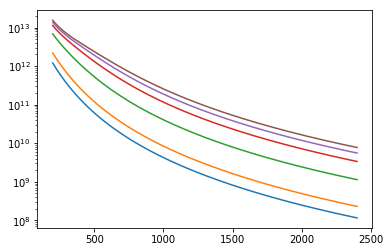

In [25]:
# PERTURBING n
gas = ct.Solution('Original_and_perturbed_reaction.cti')
k = [[],[],[],[],[],[],[]]
temperature=[[],[],[],[],[],[],[]]
for i,pressure in enumerate([.1,.2,1,3,5,7,10]):
    for temp in np.arange(200,2401): 
        gas.TPX = temp,pressure*101325,{'Ar':1}
        k[i].append(gas.forward_rate_constants[0]*1000)
        temperature[i].append(temp)
plt.figure()
plt.semilogy(temperature[0],k[0])
plt.semilogy(temperature[1],k[1])
plt.semilogy(temperature[2],k[2])
plt.semilogy(temperature[3],k[3])
plt.semilogy(temperature[4],k[4])
plt.semilogy(temperature[5],k[5])
k_combined_n=np.log10(np.array(k[0]+k[1]+k[2]+k[3]+k[4]+k[5]+k[6]))
temp_combined=temperature[0]
pressure_combined = [.1,.2,1,3,5,7,10]
coef_n = fit_cheby_poly(19,4,k_combined_n,temp_combined,pressure_combined)
coef_n.reshape(4,19).T


In [26]:
coef_n = fit_cheby_poly(19,4,k_combined_n,temp_combined,pressure_combined)
coef_n.reshape(4,19).T

array([[ 1.15796308e+01,  7.73455456e-01, -5.41660727e-02,
        -1.78614003e-03],
       [-1.56783578e+00,  2.28194909e-01,  4.68728083e-02,
        -4.39214642e-03],
       [-5.68215162e-01,  1.37454178e-02,  1.54132250e-02,
         7.01805062e-03],
       [-2.28621715e-01, -2.21481745e-02, -5.68600038e-03,
         1.28424543e-03],
       [-9.12892341e-02, -6.99931515e-03, -5.00724802e-03,
        -2.12193914e-03],
       [-3.74447883e-02,  1.48991337e-03, -1.70690240e-04,
        -8.10327061e-04],
       [-1.67884145e-02,  1.66177914e-03,  1.00097121e-03,
         3.52267882e-04],
       [-8.25957153e-03,  2.91482616e-04,  3.47393920e-04,
         2.89039627e-04],
       [-4.17305306e-03, -1.83963462e-04, -8.34412500e-05,
         2.92175557e-06],
       [-2.05584809e-03, -1.08076726e-04, -9.08488552e-05,
        -5.97694574e-05],
       [-9.93083423e-04, -4.65870093e-06, -1.33687908e-05,
        -1.78660676e-05],
       [-4.87302477e-04,  1.58313515e-05,  1.17041096e-05,
      

In [27]:
n_coefficient = np.array([[ 1.15796308e+01,  7.73455456e-01, -5.41660727e-02,
        -1.78614003e-03],
       [-1.56783578e+00,  2.28194909e-01,  4.68728083e-02,
        -4.39214642e-03],
       [-5.68215162e-01,  1.37454178e-02,  1.54132250e-02,
         7.01805062e-03],
       [-2.28621715e-01, -2.21481745e-02, -5.68600038e-03,
         1.28424543e-03],
       [-9.12892341e-02, -6.99931515e-03, -5.00724802e-03,
        -2.12193914e-03],
       [-3.74447883e-02,  1.48991337e-03, -1.70690240e-04,
        -8.10327061e-04],
       [-1.67884145e-02,  1.66177914e-03,  1.00097121e-03,
         3.52267882e-04],
       [-8.25957153e-03,  2.91482616e-04,  3.47393920e-04,
         2.89039627e-04],
       [-4.17305306e-03, -1.83963462e-04, -8.34412500e-05,
         2.92175557e-06],
       [-2.05584809e-03, -1.08076726e-04, -9.08488552e-05,
        -5.97694574e-05],
       [-9.93083423e-04, -4.65870093e-06, -1.33687908e-05,
        -1.78660676e-05],
       [-4.87302477e-04,  1.58313515e-05,  1.17041096e-05,
         6.23387692e-06],
       [-2.48195745e-04,  5.61687393e-06,  5.79376847e-06,
         5.06800571e-06],
       [-1.27815302e-04, -7.54189678e-07, -2.22153230e-07,
         3.43728061e-07],
       [-6.66931995e-05, -1.08395568e-06, -1.01099478e-06,
        -7.72281723e-07],
       [-3.28243557e-05, -1.98973070e-07, -2.58359443e-07,
        -2.72508835e-07],
       [-1.83819525e-05,  1.02275178e-07,  7.66696712e-08,
         4.33466459e-08],
       [-6.79285871e-06,  6.61849543e-08,  6.58241475e-08,
         5.75063680e-08],
       [-7.77703454e-06, -2.75708156e-09, -1.19379263e-09,
         2.07342966e-09]])

array([[ 1.15527910e+01,  7.73455456e-01, -5.41660727e-02,
        -1.78614003e-03],
       [-1.57262027e+00,  2.28194909e-01,  4.68728083e-02,
        -4.39214642e-03],
       [-5.69538386e-01,  1.37454178e-02,  1.54132250e-02,
         7.01805062e-03],
       [-2.29108645e-01, -2.21481745e-02, -5.68600038e-03,
         1.28424543e-03],
       [-9.14908157e-02, -6.99931515e-03, -5.00724802e-03,
        -2.12193914e-03],
       [-3.75338038e-02,  1.48991337e-03, -1.70690240e-04,
        -8.10327061e-04],
       [-1.68293598e-02,  1.66177914e-03,  1.00097121e-03,
         3.52267882e-04],
       [-8.27894370e-03,  2.91482616e-04,  3.47393920e-04,
         2.89039627e-04],
       [-4.18240927e-03, -1.83963462e-04, -8.34412500e-05,
         2.92175557e-06],
       [-2.06043824e-03, -1.08076726e-04, -9.08488552e-05,
        -5.97694574e-05],
       [-9.95363901e-04, -4.65870093e-06, -1.33687908e-05,
        -1.78660676e-05],
       [-4.88445848e-04,  1.58313515e-05,  1.17041096e-05,
      

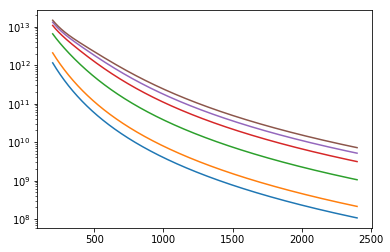

In [28]:
# PERTURBING Ea
gas = ct.Solution('Original_and_perturbed_reaction.cti')
k = [[],[],[],[],[],[],[]]
temperature=[[],[],[],[],[],[],[]]
for i,pressure in enumerate([.1,.2,1,3,5,7,10]):
    for temp in np.arange(200,2401): 
        gas.TPX = temp,pressure*101325,{'Ar':1}
        k[i].append(gas.forward_rate_constants[0]*1000)
        temperature[i].append(temp)
plt.figure()
plt.semilogy(temperature[0],k[0])
plt.semilogy(temperature[1],k[1])
plt.semilogy(temperature[2],k[2])
plt.semilogy(temperature[3],k[3])
plt.semilogy(temperature[4],k[4])
plt.semilogy(temperature[5],k[5])
k_combined_Ea=np.log10(np.array(k[0]+k[1]+k[2]+k[3]+k[4]+k[5]+k[6]))
temp_combined=temperature[0]
pressure_combined = [.1,.2,1,3,5,7,10]
coef_Ea = fit_cheby_poly(19,4,k_combined_Ea,temp_combined,pressure_combined)
coef_Ea.reshape(4,19).T

In [29]:
coef_Ea = fit_cheby_poly(19,4,k_combined_Ea,temp_combined,pressure_combined)
coef_Ea.reshape(4,19).T

array([[ 1.15527910e+01,  7.73455456e-01, -5.41660727e-02,
        -1.78614003e-03],
       [-1.57262027e+00,  2.28194909e-01,  4.68728083e-02,
        -4.39214642e-03],
       [-5.69538386e-01,  1.37454178e-02,  1.54132250e-02,
         7.01805062e-03],
       [-2.29108645e-01, -2.21481745e-02, -5.68600038e-03,
         1.28424543e-03],
       [-9.14908157e-02, -6.99931515e-03, -5.00724802e-03,
        -2.12193914e-03],
       [-3.75338038e-02,  1.48991337e-03, -1.70690240e-04,
        -8.10327061e-04],
       [-1.68293598e-02,  1.66177914e-03,  1.00097121e-03,
         3.52267882e-04],
       [-8.27894370e-03,  2.91482616e-04,  3.47393920e-04,
         2.89039627e-04],
       [-4.18240927e-03, -1.83963462e-04, -8.34412500e-05,
         2.92175557e-06],
       [-2.06043824e-03, -1.08076726e-04, -9.08488552e-05,
        -5.97694574e-05],
       [-9.95363901e-04, -4.65870093e-06, -1.33687908e-05,
        -1.78660676e-05],
       [-4.88445848e-04,  1.58313515e-05,  1.17041096e-05,
      

In [21]:
Ea_coefficient = np.array([[ 1.15527910e+01,  7.73455456e-01, -5.41660727e-02,
        -1.78614003e-03],
       [-1.57262027e+00,  2.28194909e-01,  4.68728083e-02,
        -4.39214642e-03],
       [-5.69538386e-01,  1.37454178e-02,  1.54132250e-02,
         7.01805062e-03],
       [-2.29108645e-01, -2.21481745e-02, -5.68600038e-03,
         1.28424543e-03],
       [-9.14908157e-02, -6.99931515e-03, -5.00724802e-03,
        -2.12193914e-03],
       [-3.75338038e-02,  1.48991337e-03, -1.70690240e-04,
        -8.10327061e-04],
       [-1.68293598e-02,  1.66177914e-03,  1.00097121e-03,
         3.52267882e-04],
       [-8.27894370e-03,  2.91482616e-04,  3.47393920e-04,
         2.89039627e-04],
       [-4.18240927e-03, -1.83963462e-04, -8.34412500e-05,
         2.92175557e-06],
       [-2.06043824e-03, -1.08076726e-04, -9.08488552e-05,
        -5.97694574e-05],
       [-9.95363901e-04, -4.65870093e-06, -1.33687908e-05,
        -1.78660676e-05],
       [-4.88445848e-04,  1.58313515e-05,  1.17041096e-05,
         6.23387692e-06],
       [-2.48775037e-04,  5.61687393e-06,  5.79376847e-06,
         5.06800571e-06],
       [-1.28108711e-04, -7.54189678e-07, -2.22153231e-07,
         3.43728061e-07],
       [-6.68453046e-05, -1.08395568e-06, -1.01099478e-06,
        -7.72281723e-07],
       [-3.28996528e-05, -1.98973070e-07, -2.58359443e-07,
        -2.72508835e-07],
       [-1.84244147e-05,  1.02275178e-07,  7.66696710e-08,
         4.33466459e-08],
       [-6.80859183e-06,  6.61849541e-08,  6.58241471e-08,
         5.75063680e-08],
       [-7.79493803e-06, -2.75708162e-09, -1.19379236e-09,
         2.07343017e-09]])

In [41]:
A_sensitivity = (A_coefficient- coef_original)/.01
A_sensitivity

array([[ 4.34260000e-01,  3.40000000e-06,  1.20000000e-07],
       [-4.00000000e-06, -2.60000000e-06,  5.20000000e-07],
       [-4.99999997e-07, -1.23000000e-06, -6.50000000e-07],
       [ 4.00000000e-07,  1.60000000e-07, -2.20000000e-07],
       [ 2.00000000e-07,  3.99000000e-07,  1.92000000e-07],
       [-1.00000001e-08,  1.00000000e-07,  1.19300000e-07],
       [-3.99999998e-08, -6.60000000e-08, -2.10000000e-08],
       [-1.29999999e-08, -4.80000000e-08, -3.84000000e-08],
       [ 2.99999999e-09, -1.40000000e-09, -6.76000000e-09],
       [ 3.99999998e-09,  1.01000000e-08,  6.90000000e-09],
       [ 4.99999998e-10,  3.67000000e-09,  3.67000000e-09],
       [-5.00000003e-10, -8.40000000e-10, -3.40000000e-10],
       [-1.99999999e-10, -9.46000000e-10, -8.15000000e-10],
       [ 0.00000000e+00, -1.92700000e-10, -2.34890000e-10],
       [ 9.99999996e-11,  1.98000000e-10,  1.68000000e-10]])

In [42]:
n_sensitivity = (n_coefficient- coef_original)/.01
n_sensitivity

array([[ 2.682800e+00,  0.000000e+00,  0.000000e+00],
       [ 4.794440e-01,  0.000000e+00,  0.000000e+00],
       [ 1.323222e-01,  0.000000e+00,  0.000000e+00],
       [ 4.869180e-02,  0.000000e+00,  0.000000e+00],
       [ 2.015820e-02,  0.000000e+00,  0.000000e+00],
       [ 8.900060e-03,  0.000000e+00,  0.000000e+00],
       [ 4.094830e-03,  0.000000e+00,  0.000000e+00],
       [ 1.935334e-03,  0.000000e+00,  0.000000e+00],
       [ 9.363700e-04,  0.000000e+00,  0.000000e+00],
       [ 4.564820e-04,  0.000000e+00,  0.000000e+00],
       [ 2.295660e-04,  0.000000e+00,  0.000000e+00],
       [ 1.106184e-04,  0.000000e+00,  0.000000e+00],
       [ 6.103030e-05,  0.000000e+00,  0.000000e+00],
       [ 2.227369e-05,  0.000000e+00, -2.000000e-14],
       [ 2.467490e-05,  0.000000e+00,  0.000000e+00]])

In [43]:
Ea_sensitivity = (Ea_coefficient- coef_original)/.01
Ea_sensitivity

array([[-1.18e-03,  0.00e+00,  0.00e+00],
       [ 9.95e-04,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00, -2.00e-14],
       [ 0.00e+00,  0.00e+00,  0.00e+00]])